In [65]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [128]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# dataframe de resposta para envio
answer = pd.DataFrame()

In [67]:

#número de inscrição
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']

In [68]:

train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
test.drop(['NU_INSCRICAO'],axis=1, inplace=True)

In [69]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['IN_TREINEIRO'].sort_values(ascending=False)[:10], '\n')

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.533983
TP_PRESENCA_CN     0.094692
TP_PRESENCA_CH     0.094692
TP_PRESENCA_LC     0.092454
TP_PRESENCA_MT     0.092454
Q034               0.055265
Q039               0.040348
Q005               0.033411
Q038               0.018855
Name: IN_TREINEIRO, dtype: float64 



In [70]:

train.shape, test.shape

((13730, 166), (4570, 42))

In [108]:

test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


In [112]:
train = train[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'IN_TREINEIRO']]
test = test[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']]

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NU_IDADE         13730 non-null  int64
 1   TP_ST_CONCLUSAO  13730 non-null  int64
 2   TP_PRESENCA_CN   13730 non-null  int64
 3   TP_PRESENCA_CH   13730 non-null  int64
 4   TP_PRESENCA_LC   13730 non-null  int64
 5   TP_PRESENCA_MT   13730 non-null  int64
 6   IN_TREINEIRO     13730 non-null  int64
dtypes: int64(7)
memory usage: 751.0 KB


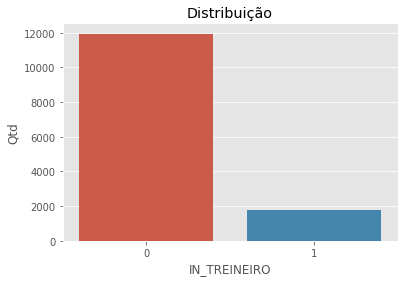

In [73]:
train['IN_TREINEIRO'].value_counts()
ax = sns.countplot(x='IN_TREINEIRO', data=train)
plt.ylabel('Qtd')
plt.title('Distribuição');

In [74]:
from imblearn.over_sampling import SMOTE


In [75]:
smt = SMOTE()
target = train['IN_TREINEIRO']
type(target)

pandas.core.series.Series

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


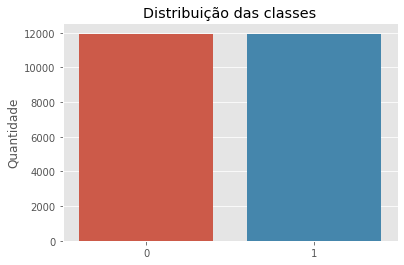

In [76]:
train, target = smt.fit_sample(train, target)
np.bincount(target)
ax = sns.countplot(x=target)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes');

In [129]:

features = ['TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
features_corr = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
df_train = train[features_corr]
df_test = test[features]

In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TP_ST_CONCLUSAO  13730 non-null  int64
 1   TP_PRESENCA_CN   13730 non-null  int64
 2   TP_PRESENCA_CH   13730 non-null  int64
 3   TP_PRESENCA_LC   13730 non-null  int64
 4   TP_PRESENCA_MT   13730 non-null  int64
dtypes: int64(5)
memory usage: 536.5 KB


In [130]:
y_train = df_train[['IN_TREINEIRO']]
df_train.drop('IN_TREINEIRO', axis=1, inplace=True)
x_train = df_train
x_test = df_test
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NameError: ignored

In [131]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [133]:
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [134]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [137]:

y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [138]:
y_pred_test

array([0., 0., 1., ..., 0., 0., 0.])

In [139]:
y_pred_test

array([0., 0., 1., ..., 0., 0., 0.])

In [140]:
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
answer['IN_TREINEIRO'] = y_pred_test.astype(int)

In [142]:
answer.sample(20)

,NU_INSCRICAO,IN_TREINEIRO
3526,b9bac5680938dc9d60c024229fbcf6c78df51d3a,0
1903,02eeede1072e08d68607c1d7d683199b6f1b73f4,0
617,7d1d1090be5a78c10223046e91aeee7eb62f72f6,0
1758,a3796a582b1a80a90685defd566c8720e5a1577d,0
681,578122a663fe322ae9a56b06c6a530c14333b0d3,0
2702,2968dac584fc4a4f5eaf44d7e33e1a636318f259,0
3439,afbdf5f1a867f636b9b8db738991bae4c320f245,0
4062,93fbaa57d05dfc17b61a97eae9fe3e047e63d4a7,0
4119,840381b873e637d0960634de44f23bd733204227,1
1411,b93f9bae498cd0a60a5cedbe1557e94c115882aa,0


In [141]:
answer.to_csv('answer.csv', index=False, header=True)
